**Đề bài**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

Content In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them.

# **1. Phân tích tập dữ liệu**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1.1 Tổng quan về tập dữ liệu *train*

In [2]:
train_dataset = pd.read_csv('Train.csv')

In [3]:
train_dataset.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
train_dataset.describe()

ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000

In [6]:
# Số giá trị null của tập dữ liệu trên từng cột
train_dataset.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
# Trích xuất giá trị có trong mỗi cột
column_names = train_dataset.columns
for i in column_names[1:]:
  if i == 0:
    continue
  print(train_dataset[i].unique())

['Male' 'Female']
['No' 'Yes' nan]
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
['No' 'Yes' nan]
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
['Low' 'Average' 'High']
[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
['D' 'A' 'B' 'C']


## 1.2. Exploratory Data Analysis + Fill null values + Turn label in to numerical categories

In [8]:
# Tạo một tập dữ liệu copy từ train_dataset để tránh thay đổi dữ liệu gốc
train = train_dataset.copy()

### 1.2.1 Cột "Gender"

In [9]:
# Số lượng các giá trị trong cột "Gender" theo từng segment
counts = train.groupby(['Gender', 'Segmentation']).size()
print(counts)

Gender  Segmentation
Female  A                909
        B                861
        C                922
        D                959
Male    A               1063
        B                997
        C               1048
        D               1309
dtype: int64


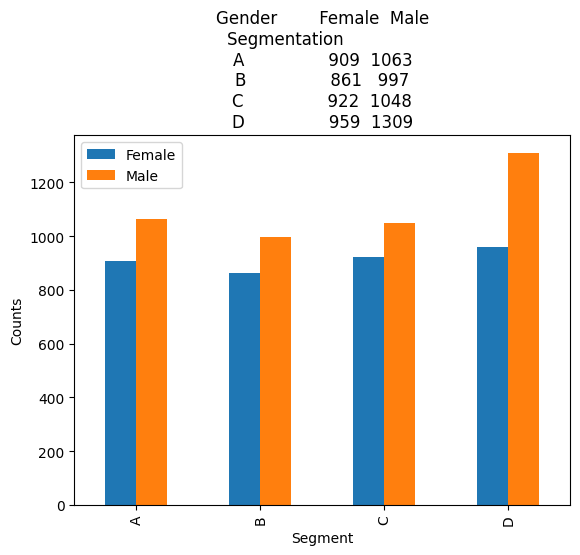

In [10]:
# Visualization
counts_df = counts.unstack(level=0)
counts_df.plot(kind='bar')

# Thêm tiêu đề và các nhãn cho biểu đồ
plt.xlabel('Segment')
plt.ylabel('Counts')
plt.legend(['Female', 'Male'])
plt.title(str(counts_df))
plt.show()

*Nhận xét: - Trong tất cả các segment, "Female" luôn nhiều hơn "Male"*

In [11]:
# Turn label in to numerical categories
train.Gender = pd.Categorical(train.Gender,categories=['Male','Female'],ordered=True).codes

### 1.2.2. Cột "Ever_Married"

In [12]:
# Các giá trị trong cột 'Ever_Married'
print("null values:", train.Ever_Married.isnull().sum())
print(train.Ever_Married.value_counts())

null values: 140
Yes    4643
No     3285
Name: Ever_Married, dtype: int64


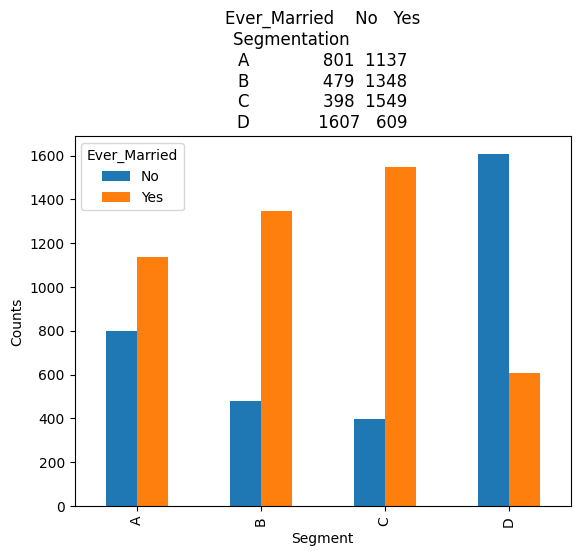

In [13]:
# Visualization
counts = train.groupby(['Ever_Married', 'Segmentation']).size()
counts_df = counts.unstack(level=0)
counts_df.plot(kind='bar')

# Thêm nhãn vầ title
plt.xlabel('Segment')
plt.ylabel('Counts')
plt.title(str(counts_df))
plt.show()

*Nhận xét: - Nhóm A,B,C chủ yếu là người "ever_married". Trong khi đó, hầu hết người trong nhóm D "not_ever_married"*

**- Fill null values**

In [14]:
# Đếm số lượng các giá trị null trong cột "Ever_Married" của các segment
print(train['Ever_Married'].isna().groupby(train['Segmentation']).sum())

Segmentation
A    34
B    31
C    23
D    52
Name: Ever_Married, dtype: int64


In [15]:
train.loc[train['Segmentation'] == 'D','Ever_Married'] = 'No'
train['Ever_Married'].fillna('Yes',inplace=True)

In [16]:
# Kiểm tra xem còn có giá trị null trong cột "Ever_Married" hay không
print("Number of null values in 'Ever_Married':(after)", train['Ever_Married'].isnull().sum())

Number of null values in 'Ever_Married':(after) 0


In [17]:
# Turn label in to numerical categories
train.Ever_Married=pd.Categorical(train.Ever_Married,categories=['No','Yes'],ordered=True).codes

### 1.2.3. Cột "Age"

In [18]:
train['Age'].values

array([22, 38, 67, ..., 33, 27, 37])

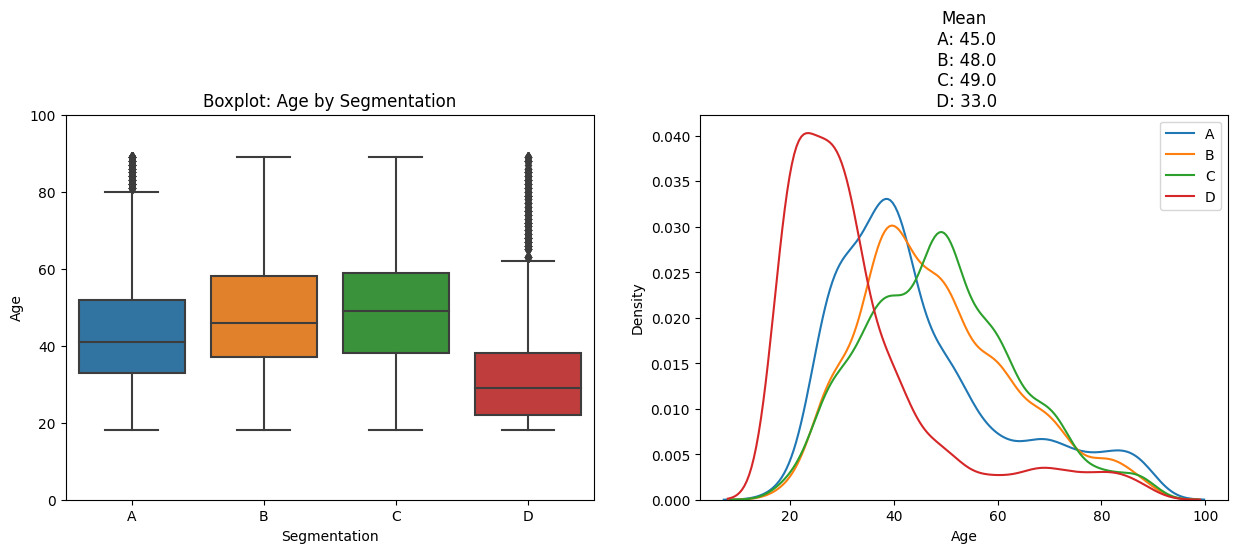

In [19]:
# Looking the distribution of column Age with respect to each segment
a = train[train.Segmentation =='A']["Age"]
b = train[train.Segmentation =='B']["Age"]
c = train[train.Segmentation =='C']["Age"]
d = train[train.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

# Creating a boxplot
plt.subplot(1,2,1)
sns.boxplot(x='Segmentation', y='Age', data=train, order = ['A','B','C','D'])
plt.xlabel('Segmentation')
plt.ylabel('Age')
plt.title('Boxplot: Age by Segmentation')
plt.ylim(0, 100)

# Creating a kde plot
plt.subplot(1,2,2)
sns.kdeplot(a,fill = False, label = 'A')
sns.kdeplot(b,fill = False, label = 'B')
sns.kdeplot(c,fill = False, label = 'C')
sns.kdeplot(d,fill = False, label = 'D')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))
plt.legend()

plt.show()

Nhận xét:
- Độ tuổi trong segment D thấp nhất nhưng cũng có nhiều outliers tập trung từ 60 đến 90.
- Độ tuổi trong segment A có outliers từ 80 đến 90.
- Độ tuổi trong segment B và C khá tương đồng nhau, phân phối tuổi đồng nhất hơn và không có outliers.

### 1.2.4. Cột "Graduated"

In [20]:
# Các giá trị trong cột 'Graduated'
print("null values:", train.Graduated.isnull().sum())
print(train.Graduated.value_counts())

null values: 78
Yes    4968
No     3022
Name: Graduated, dtype: int64


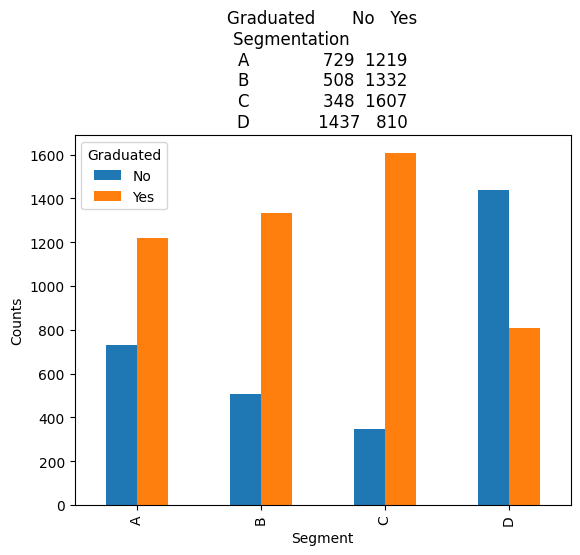

In [21]:
# Visualization
counts = train.groupby(['Graduated', 'Segmentation']).size()
counts_df = counts.unstack(level=0)
counts_df.plot(kind='bar')

# Thêm nhãn vầ title
plt.xlabel('Segment')
plt.ylabel('Counts')
plt.title(str(counts_df))
plt.show()

*Nhận xét: Segment A,B,C phần lớn là người 'Graduated'. Segment D phần lớn là người 'Not Graduated'*

**- Fill null values**

In [22]:
# Đếm số lượng các giá trị null trong cột "Graduated" của các segment
print(train['Graduated'].isna().groupby(train['Segmentation']).sum())

Segmentation
A    24
B    18
C    15
D    21
Name: Graduated, dtype: int64


In [23]:
train.loc[train['Segmentation'] == 'D','Graduated'] = 'No'
train.Graduated.fillna('Yes',inplace=True)

In [24]:
# Kiểm tra xem còn có giá trị null trong cột "Graduated" hay không
print("Number of null values in 'Graduated'(after):", train['Graduated'].isnull().sum())

Number of null values in 'Graduated'(after): 0


In [25]:
# Turn label in to numerical categories
train.Graduated = pd.Categorical(train.Graduated,categories=['No','Yes'],ordered=True).codes

### 1.2.5. Cột "Profession"

In [26]:
# Các giá trị trong cột "Profession"
print("null values:", train.Profession.isnull().sum())
print(train.Profession.value_counts())

null values: 124
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64


In [27]:
value_counts = train.groupby('Segmentation')['Profession'].value_counts()
value_counts.groupby(level=0, group_keys=False).nlargest(len(value_counts))

Segmentation  Profession   
A             Artist            558
              Entertainment     365
              Engineer          259
              Doctor            199
              Lawyer            197
              Executive         125
              Healthcare        106
              Homemaker          73
              Marketing          57
B             Artist            756
              Entertainment     221
              Engineer          189
              Executive         183
              Lawyer            158
              Doctor            143
              Healthcare        101
              Homemaker          55
              Marketing          30
C             Artist           1065
              Executive         175
              Entertainment     148
              Healthcare        146
              Doctor            140
              Lawyer            140
              Engineer           75
              Marketing          35
              Homemaker          28


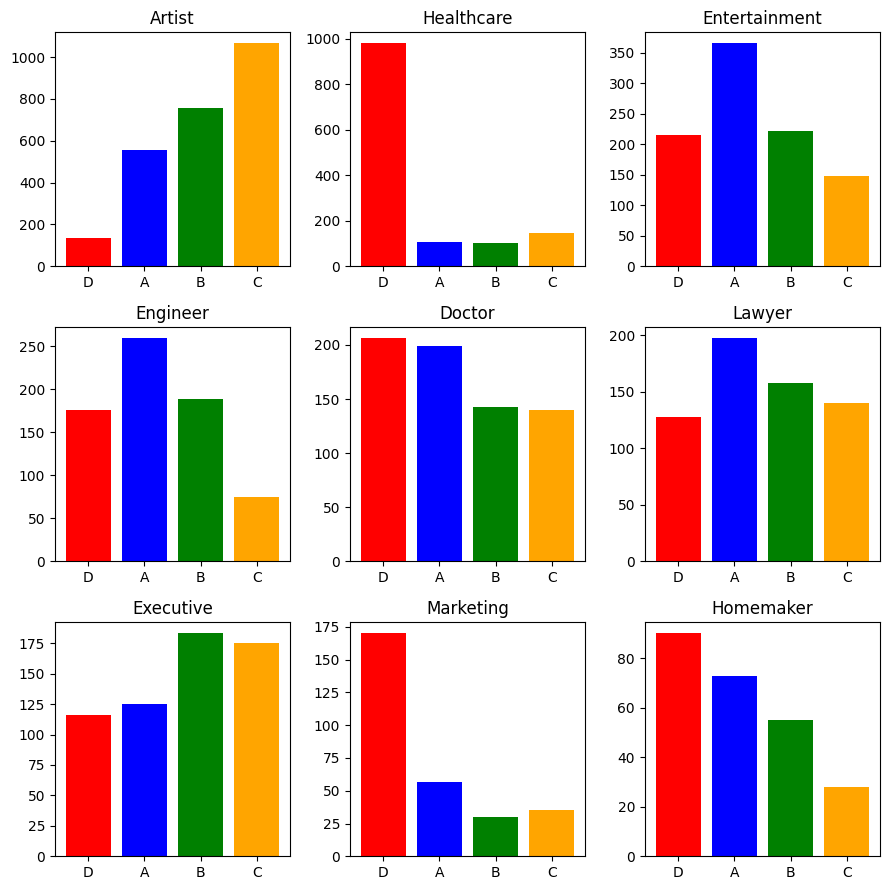

In [28]:
# Tạo từ điển ánh xạ giữa segment và màu tương ứng
segment_colors = {
    'A': 'blue',
    'B': 'green',
    'C': 'orange',
    'D': 'red'
}

# Tạo subplot với 3 hàng và 3 cột
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

# Lấy danh sách các giá trị trong cột Profession và sắp xếp theo counts
professions = train['Profession'].value_counts().index

# Lấy danh sách các giá trị trong cột Segmentation
segments = train['Segmentation'].unique()

# Duyệt qua từng giá trị trong cột Profession và vẽ plot tương ứng
for i, profession in enumerate(professions):
    row = i // 3
    col = i % 3
    ax = axs[row, col]

    # Lọc dữ liệu theo giá trị của Profession
    data = train[train['Profession'] == profession]

    # Vẽ biểu đồ cột trong plot hiện tại
    for j, segment in enumerate(segments):
        segment_data = data[data['Segmentation'] == segment]
        ax.bar(segment, segment_data.shape[0], color=segment_colors[segment])

    # Đặt tiêu đề cho plot
    ax.set_title(f'{profession}')

# Cân chỉnh và hiển thị subplot
plt.tight_layout()
plt.show()

*Nhận xét: Nhóm A, B, C nhiều nhất là Artist, D nhiều nhất là Healthcare*

**- Fill null values**

In [29]:
# Đếm số lượng các giá trị null trong cột "Profession" của các segment
print(train['Profession'].isna().groupby(train['Segmentation']).sum())

Segmentation
A    33
B    22
C    18
D    51
Name: Profession, dtype: int64


In [30]:
train.loc[train['Segmentation'] == 'D','Profession'] = 'Healthcare'
train.Profession.fillna('Artist',inplace=True)

In [31]:
# Kiểm tra xem còn có giá trị null trong cột "Profession" hay không
print("Number of null values in 'Profession'(after):", train['Profession'].isnull().sum())
# Các giá trị trong cột "Profession"
print(train.Profession.value_counts())

Number of null values in 'Profession'(after): 0
Healthcare       2621
Artist           2452
Entertainment     734
Engineer          523
Lawyer            495
Executive         483
Doctor            482
Homemaker         156
Marketing         122
Name: Profession, dtype: int64


In [32]:
# Turn label in to numerical categories
train.Profession=pd.Categorical(train.Profession,categories=['Homemaker', 'Artist', 'Healthcare', 'Entertainment', 'Doctor', 'Lawyer', 'Executive', 'Marketing', 'Engineer'],ordered=True).codes

### 1.2.6 Cột "Speding_Score"

In [33]:
# Đếm số lượng các giá trị null trong cột "Spending_Score" của các segment
count_ss = train.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack()
print(count_ss)

Spending_Score  Average  High   Low
Segmentation                       
A                   343   271  1358
B                   590   384   884
C                   903   405   662
D                   138   156  1974


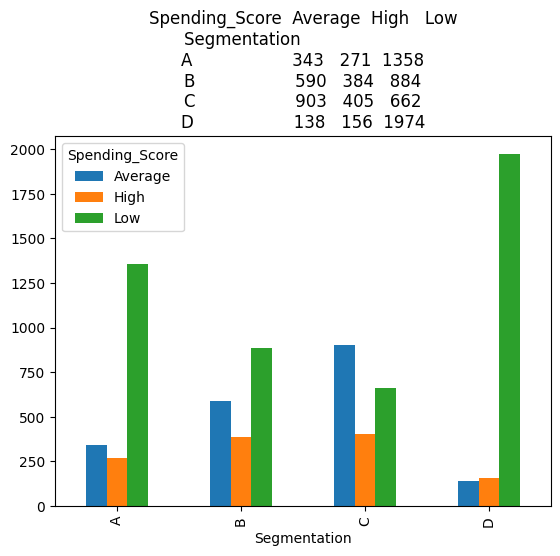

In [34]:
# Visualize
count_ss.plot(kind = 'bar')
plt.title(str(count_ss))
plt.show()

In [35]:
# Turn label in to numerical categories
train.Spending_Score=pd.Categorical(train.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

### 1.2.7. Cột "Work_Experience"

In [36]:
# Các giá trị trong cột "Work_Experience"
print("null values:", train.Work_Experience.isnull().sum())
print(train.Work_Experience.value_counts())

null values: 829
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64


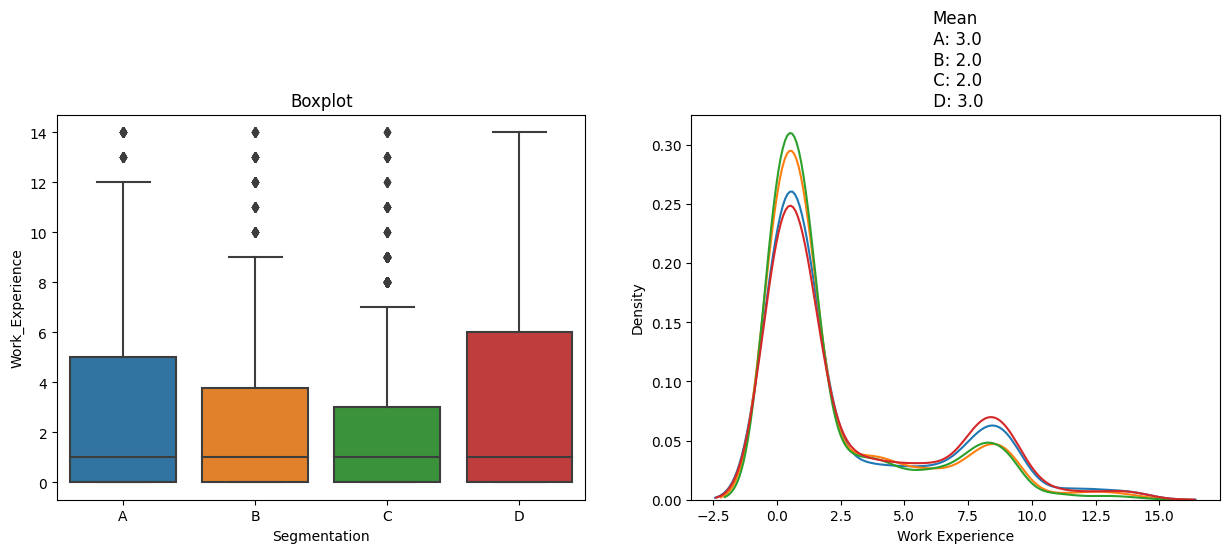

In [37]:
# Looking the distribution of column Work_Experience w.r.t to each segment
a = train[train.Segmentation =='A']["Work_Experience"]
b = train[train.Segmentation =='B']["Work_Experience"]
c = train[train.Segmentation =='C']["Work_Experience"]
d = train[train.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train, x = "Segmentation", y="Work_Experience", order = ['A','B','C','D'])
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,fill = False, label = 'A')
sns.kdeplot(b,fill = False, label = 'B')
sns.kdeplot(c,fill = False, label = 'C')
sns.kdeplot(d,fill = False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [38]:
# Đếm số lượng các giá trị null trong cột "Work_Experience" của các segment
print(train['Work_Experience'].isna().groupby(train['Segmentation']).sum())

Segmentation
A    194
B    192
C    155
D    288
Name: Work_Experience, dtype: int64


*Cột này sẽ được bỏ đi vì dữ liệu sẽ không giúp ích nhiều*

In [39]:
### 1.3.8. Cột "Family_Size"

In [40]:
# Các giá trị trong cột "Family_Size"
print("null values:", train.Family_Size.isnull().sum())
print(train.Family_Size.value_counts())

null values: 335
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


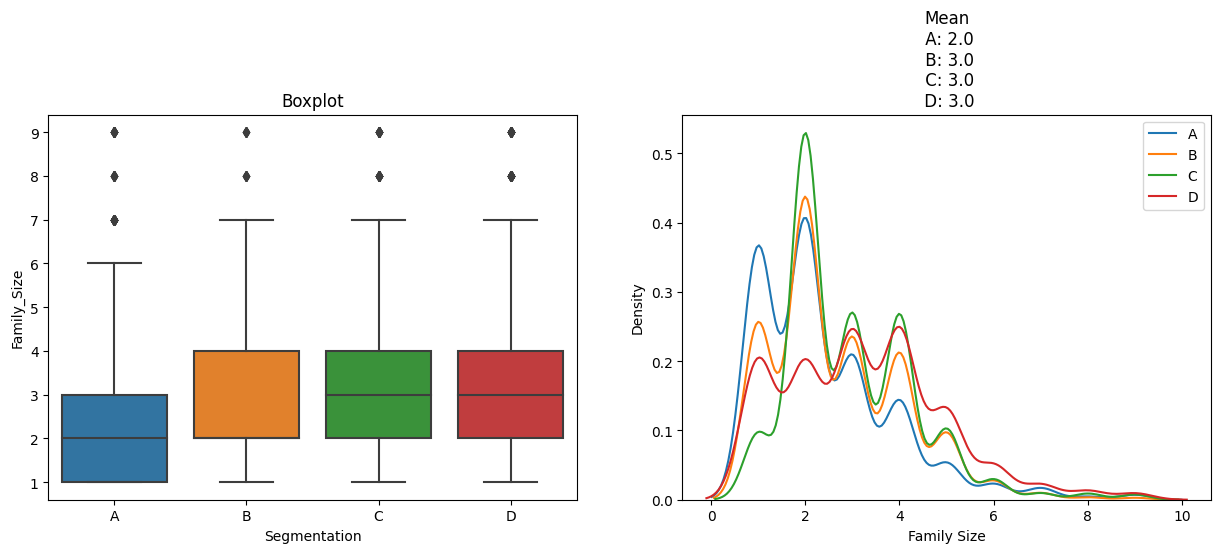

In [41]:
# Looking the distribution of column Family Size w.r.t to each segment
a = train[train.Segmentation =='A']["Family_Size"]
b = train[train.Segmentation =='B']["Family_Size"]
c = train[train.Segmentation =='C']["Family_Size"]
d = train[train.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train, x = "Segmentation", y="Family_Size", order = ['A','B','C','D'])
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a, fill = False, label = 'A')
sns.kdeplot(b, fill = False, label = 'B')
sns.kdeplot(c, fill = False, label = 'C')
sns.kdeplot(d, fill = False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))
plt.legend()

plt.show()

*Nhận xét: 'Family_Size' của B,C,D khá tương đồng nhau, trong khi của A thấp hơn.*

**- Fill null values**

In [42]:
# Đếm số lượng các giá trị null trong cột "Family_Size" của các segment
print(train['Family_Size'].isna().groupby(train['Segmentation']).sum())

Segmentation
A     95
B     43
C     44
D    153
Name: Family_Size, dtype: int64


In [43]:
train.Family_Size.fillna(2,inplace=True)

In [44]:
# Kiểm tra xem còn có giá trị null trong cột "Family_Size" hay không
print("null values:", train.Family_Size.isnull().sum())
# Các giá trị trong cột "Family_Size"
print(train.Family_Size.value_counts())

null values: 0
2.0    2725
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


### 1.2.8. Cột "Var_1"

In [45]:
# Các giá trị trong cột "Var_1"
print("null values:", train.Var_1.isnull().sum())
print(train.Var_1.value_counts())

null values: 76
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


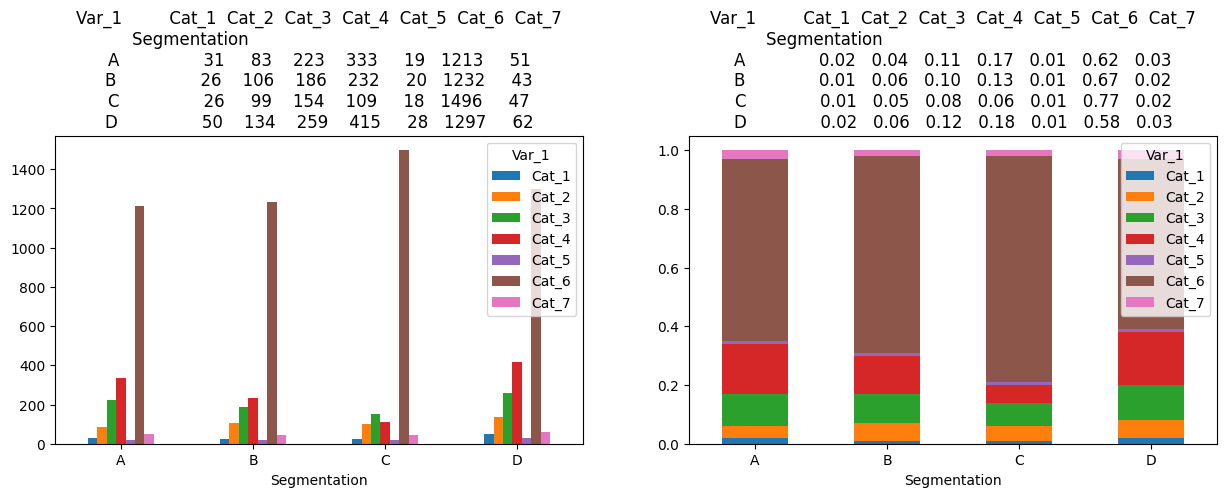

In [46]:
# Counting Var_1 in each segment
ax1 = train.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = train.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

*Nhận xét: Cat_6 chiếm phần lớn trong tất cả các segment*

**- Chuyển tất cả các giá trị null thành Cat_6**

In [47]:
train.Var_1.fillna('Cat_6',inplace=True)

In [48]:
train.Var_1 = pd.Categorical(train.Var_1,categories=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],ordered=True).codes

## 1.3 Feature Engineering

In [49]:
# Chuyển cột 'Segmentation' sang numerical
train.Segmentation = pd.Categorical (train.Segmentation, categories = ['A', 'B', 'C', 'D'], ordered = True).codes

In [50]:
# Drop cột 'ID'
train.drop('ID', axis = 1, inplace = True)

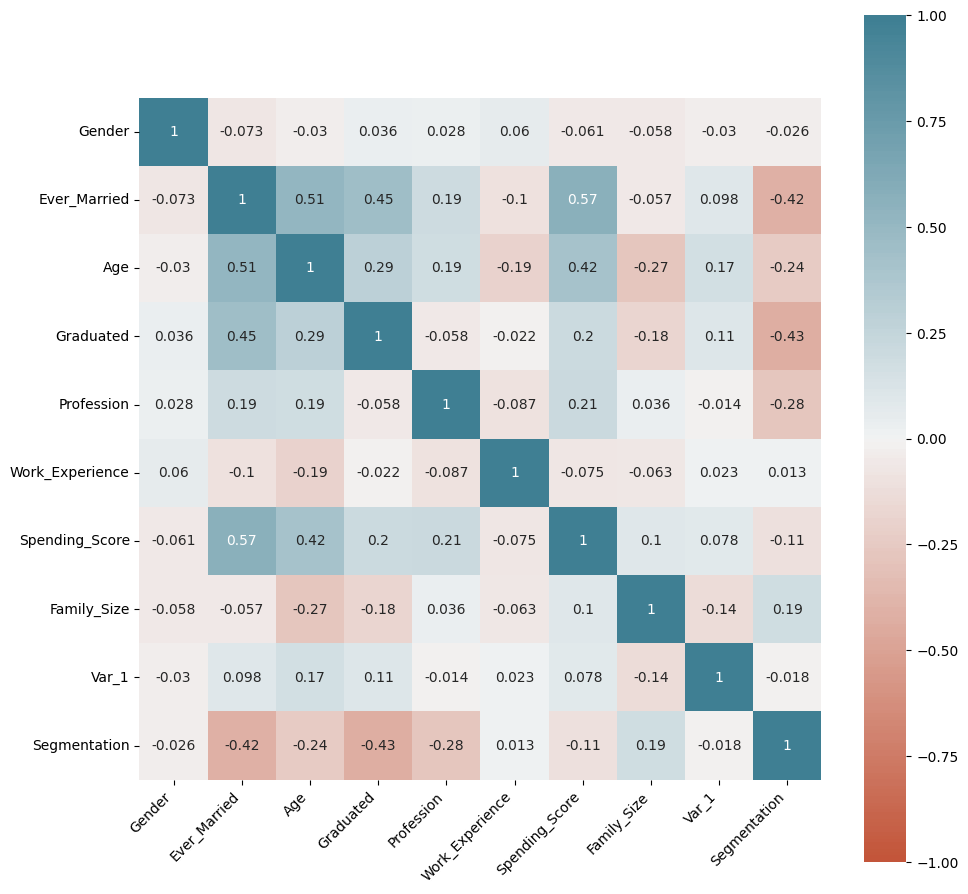

In [51]:
# bảng correlation giữa các cột vs nhau
cor = train.corr(method='pearson')

# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(
    cor, #dataset
    vmin=-1, vmax=1, #values to anchor the heatmap
    center=0, #value để center, look at the color bar
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, #each cell is square-shaped
    ax=ax,
    annot=True #để mỗi cell có text
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [52]:
# Corr của work experience, var 1, gender < 0,1 -> bỏ
train = train.drop ('Work_Experience', axis =1)
train = train.drop ('Var_1', axis = 1)
train = train.drop ('Gender', axis = 1)

In [53]:
# Xem dữ liệu trong 'train' sau khi chuyển đổi sang numerical
train

Ever_Married  Age  Graduated  Profession  Spending_Score  Family_Size  \
0                0   22          0           2               0          4.0   
1                1   38          1           8               1          3.0   
2                1   67          1           8               0          1.0   
3                1   67          1           5               2          2.0   
4                1   40          1           3               2          6.0   
...            ...  ...        ...         ...             ...          ...   
8063             0   22          0           2               0          7.0   
8064             0   35          0           2               0          4.0   
8065             0   33          0           2               0          1.0   
8066             0   27          1           2               0          4.0   
8067             1   37          1           6               1          3.0   

      Segmentation  
0                3  
1                0  
2                1  
3                1  
4                0  
...            ...  
8063             3  
8064             3  
8065             3  
8066             1  
8067             1  

[8068 rows x 7 columns]

**=> Từ phần 1, ta có một bộ dữ liệu numerical dựa trên 'train_dataset', ta sẽ gán dữ liệu này là 'data'**

In [54]:
data = train.copy()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ever_Married    8068 non-null   int8   
 1   Age             8068 non-null   int64  
 2   Graduated       8068 non-null   int8   
 3   Profession      8068 non-null   int8   
 4   Spending_Score  8068 non-null   int8   
 5   Family_Size     8068 non-null   float64
 6   Segmentation    8068 non-null   int8   
dtypes: float64(1), int64(1), int8(5)
memory usage: 165.6 KB


# **2. Phân loại dữ liệu bằng các mô hình học máy**

## 2.1. Thử các mô hình học máy

Dùng các model: *Softmax Regression, KNeighborsClassifiers, LGMCLassifier, DecisionTreeClassifier, RandomForestClassifier, SupportVectorMachineClassifier, NaiveBayesCLassifier* để phân loại dữ liệu train. Sau đó chọn mô hình tốt nhất để tối ưu.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

from lightgbm  import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble    import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

Chia dữ liệu 'data' thành X_train, y_train, X_val, y_val

In [57]:
X = data.values[:,:6]   # X.shape = (8068,8)
y = data.values[:,6]    # Y.shape = (8068,)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_val.shape:', X_val.shape)
print('y_val.shape:', y_val.shape)

X_train.shape: (6454, 6)
y_train.shape: (6454,)
X_val.shape: (1614, 6)
y_val.shape: (1614,)


In [58]:
# k-fold
num_folds = 10
seed = 42
scoring = 'accuracy'

In [59]:
models = []
models.append(('LR', LogisticRegression(multi_class = 'multinomial', max_iter = 10000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LGB', LGBMClassifier()))
models.append(('Decision tree', DecisionTreeClassifier(max_depth = 10)))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVC', SVC(decision_function_shape = 'ovo')))
models.append(('Naive Bayes', GaussianNB()))

In [60]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.608205 (0.018858)
KNN: 0.598660 (0.020080)
LGB: 0.650099 (0.012623)
Decision tree: 0.640554 (0.016703)
Random Forest: 0.621221 (0.016473)
SVC: 0.539043 (0.021807)
Naive Bayes: 0.622831 (0.018413)


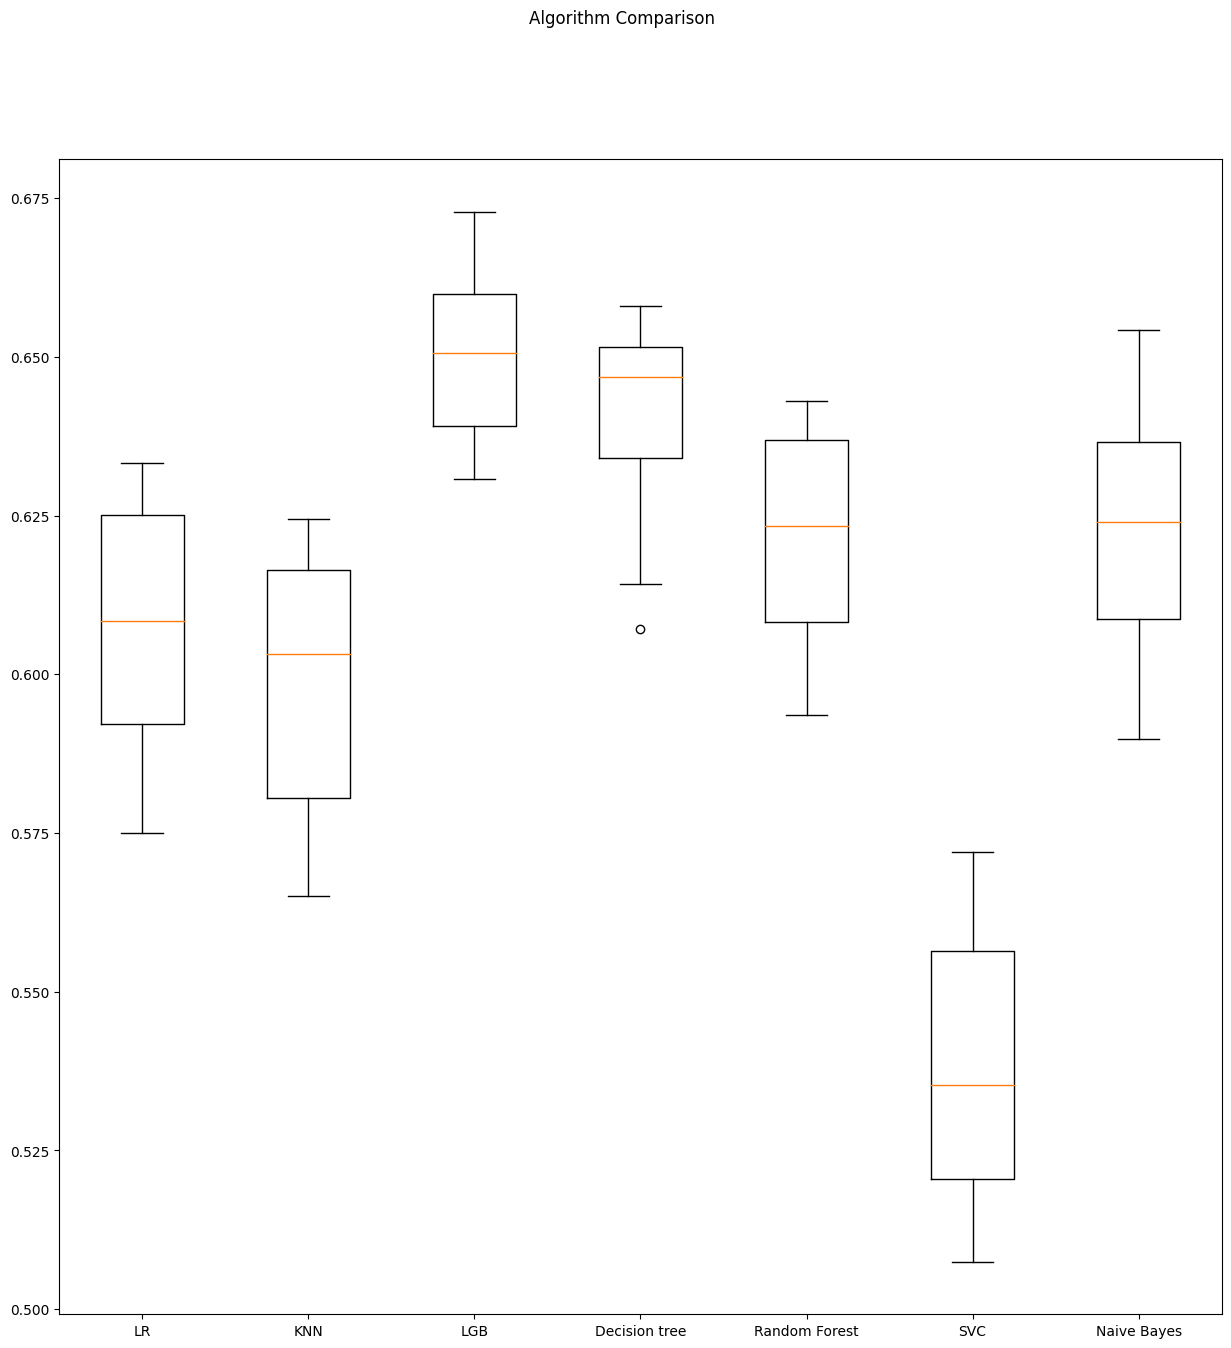

In [61]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import *

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression(multi_class = 'multinomial', max_iter=1000))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('Decision Tree',DecisionTreeClassifier())])))
pipelines.append(('ScaledLGB', Pipeline([('Scaler', StandardScaler()),('LGB', LGBMClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('Random Forest', RandomForestClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC(decision_function_shape='ovo'))])))
pipelines.append(('ScaledNaive', Pipeline([('Scaler', StandardScaler()),('Naive Bayes', GaussianNB())])))


results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.608765 (0.012875)
ScaledKNN: 0.614347 (0.018594)
ScaledCART: 0.606137 (0.011501)
ScaledLGB: 0.644250 (0.014573)
ScaledKNN: 0.620856 (0.012110)
ScaledSVC: 0.634487 (0.011246)
ScaledNaive: 0.619613 (0.015024)


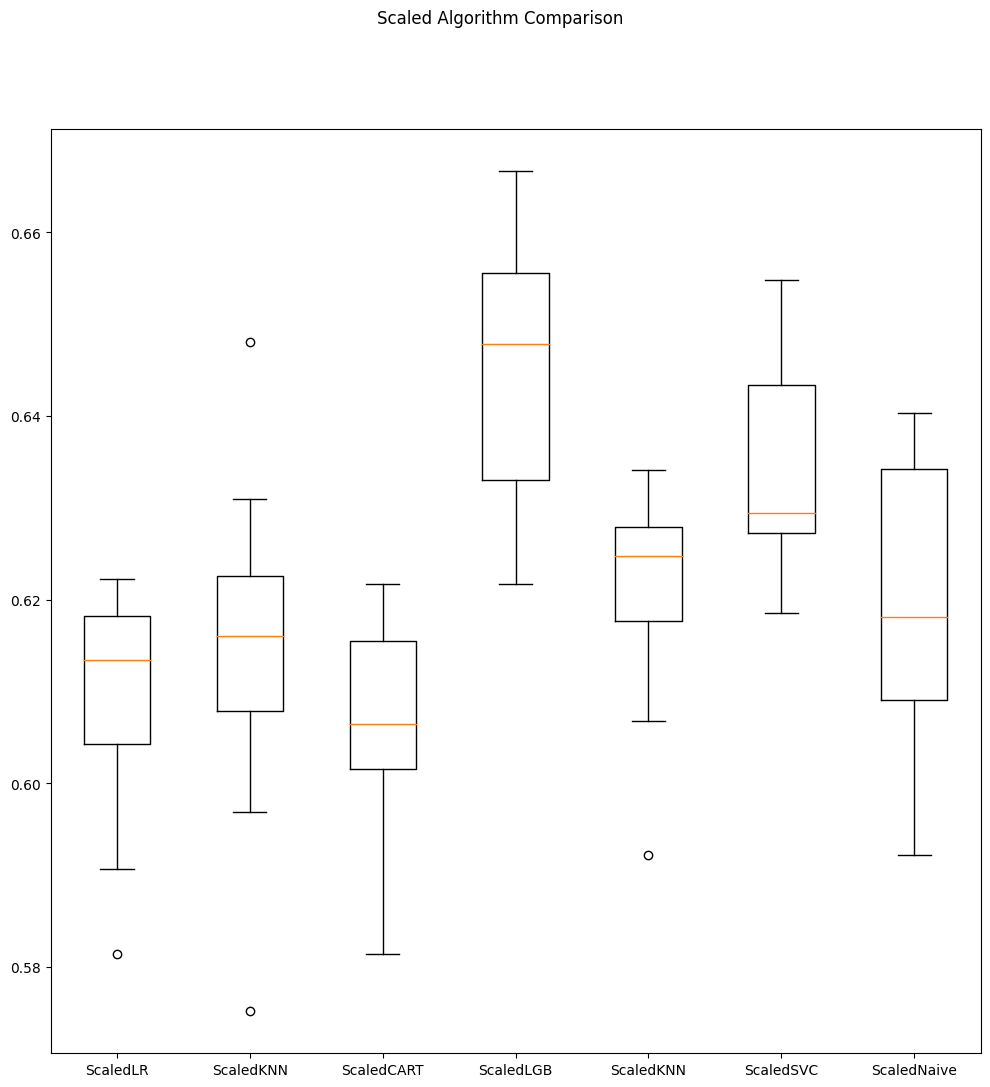

In [63]:
# Compare Algorithms đã chuẩn hóa
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### => Ở cả 'Not_Scaled_Data' và 'Scaled_Data', LGBMClassifier đều cho kết quả tốt nhất. Do đó, ta sẽ chọn tối ưu hóa mô hình này

## 2.2. Tối ưu hóa LGBMClassifier

In [64]:
from sklearn.model_selection import RandomizedSearchCV

model = LGBMClassifier()
parameters = {'learning_rate': [0.01], 'n_estimators': [8, 24],
    'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03], 'colsample_bytree': [0.65, 0.75, 0.8],}
clf = RandomizedSearchCV(model, parameters, scoring = 'accuracy', n_iter=100)
clf.fit(X = X_train, y = y_train)
print(clf.best_params_)
predicted = clf.predict(X_val)
print('Classification of the result is:')
print(accuracy_score(y_val, predicted))

{'reg_alpha': 0.03, 'num_leaves': 40, 'n_estimators': 8, 'min_child_samples': 5, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.75}
Classification of the result is:
0.6617100371747212


=> Tham số tốt nhất là: *{'reg_alpha': 0.03, 'num_leaves': 20, 'n_estimators': 24, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.65}*

In [65]:
best_lgbm = LGBMClassifier(reg_alpha=0.03, num_leaves=20, n_estimators=24, min_child_samples=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.65)
best_lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.65, max_depth=10, min_child_samples=10,
               n_estimators=24, num_leaves=20, reg_alpha=0.03)

In [66]:
from sklearn.metrics import *

predictions = best_lgbm.predict(X_val)
print (classification_report(y_val, predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.68      0.62       391
         1.0       0.47      0.26      0.33       369
         2.0       0.54      0.62      0.58       380
         3.0       0.95      1.00      0.98       474

    accuracy                           0.66      1614
   macro avg       0.63      0.64      0.63      1614
weighted avg       0.65      0.66      0.65      1614



In [67]:
cm = confusion_matrix(y_val, predictions)
print(cm)

[[265  54  68   4]
 [129  96 136   8]
 [ 76  55 237  12]
 [  0   0   0 474]]


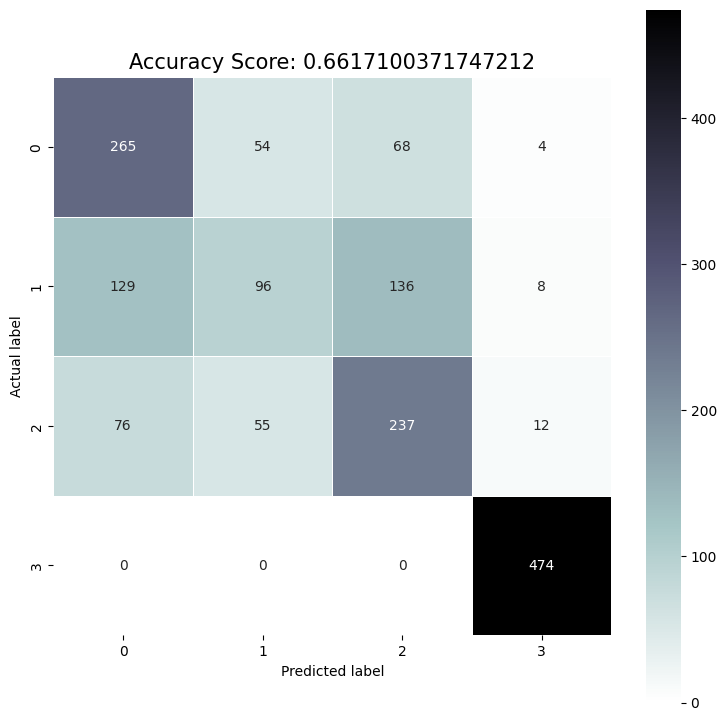

In [68]:
# Visualize bằng seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="n", linewidths=.5, square = True, cmap = 'bone_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_val, predicted))
plt.title(all_sample_title, size = 15);

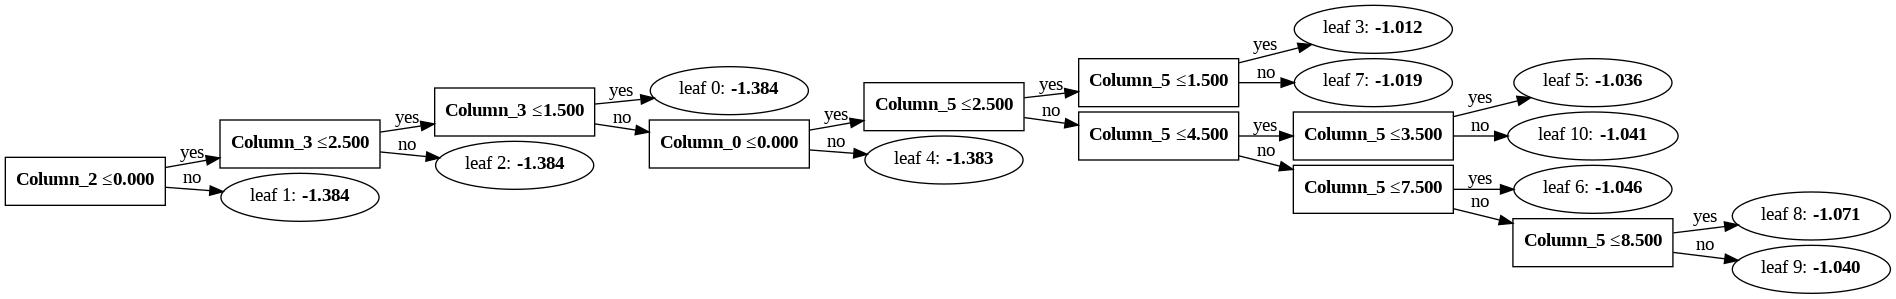

In [69]:
import lightgbm as lgb
from IPython.display import Image
import pydotplus

# Tạo đồ thị cây quyết định
graph = lgb.create_tree_digraph(best_lgbm, tree_index=3, name='Tree3')

# Chuyển đổi đồ thị thành hình ảnh
image = pydotplus.graph_from_dot_data(graph.source).create_png()

# Hiển thị hình ảnh
Image(image)

# **3. Phân loại dữ liệu bằng mô hình Deep Learning**



In [70]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.layers import Dropout

# Mã hóa nhãn y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Chuyển đổi nhãn y sang dạng one-hot
num_classes = len(label_encoder.classes_)
y_train_onehot = np_utils.to_categorical(y_train_encoded, num_classes)
y_val_onehot = np_utils.to_categorical(y_val_encoded, num_classes)

# Xây dựng kiến trúc mô hình
model_DL = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.5),  # Thêm dropout với tỷ lệ loại bỏ 50%
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),  # Thêm dropout với tỷ lệ loại bỏ 50%
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile mô hình
model_DL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model_DL.fit(X_train, y_train_onehot, epochs=20, batch_size=32, validation_data=(X_val, y_val_onehot))

# Đánh giá mô hình
test_loss, test_acc = model_DL.evaluate(X_val, y_val_onehot)
print('Test accuracy:', test_acc)


Epoch 1/20
202/202 [==============================] - 2s 5ms/step - loss: 3.1177 - accuracy: 0.2611 - val_loss: 1.3822 - val_accuracy: 0.2937
Epoch 2/20
202/202 [==============================] - 1s 3ms/step - loss: 1.4891 - accuracy: 0.2842 - val_loss: 1.3814 - val_accuracy: 0.2937
Epoch 3/20
202/202 [==============================] - 1s 4ms/step - loss: 1.4102 - accuracy: 0.3026 - val_loss: 1.3788 - val_accuracy: 0.2937
Epoch 4/20
202/202 [==============================] - 1s 4ms/step - loss: 1.3752 - accuracy: 0.3215 - val_loss: 1.3488 - val_accuracy: 0.3569
Epoch 5/20
202/202 [==============================] - 1s 3ms/step - loss: 1.3335 - accuracy: 0.3458 - val_loss: 1.2752 - val_accuracy: 0.4294
Epoch 6/20
202/202 [==============================] - 1s 3ms/step - loss: 1.2694 - accuracy: 0.4022 - val_loss: 1.1300 - val_accuracy: 0.5533
Epoch 7/20
202/202 [==============================] - 1s 3ms/step - loss: 1.1786 - accuracy: 0.4371 - val_loss: 1.0067 - val_accuracy: 0.5161
Epoch 

# **4. Sử dụng mô hình để dự đoán trên tập test**

*Import tập dữ liệu test*

In [71]:
Test = pd.read_csv('Test.csv')

In [72]:
Test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [73]:
# Biến đổi dữ liệu tập test như tập train
Test.Gender = pd.Categorical(Test.Gender,categories=['Male','Female'],ordered=True).codes
Test.loc[Test['Segmentation'] == 'D','Ever_Married'] = 'No'
Test['Ever_Married'].fillna('Yes',inplace=True)
Test.Ever_Married=pd.Categorical(Test.Ever_Married,categories=['No','Yes'],ordered=True).codes
Test.loc[Test['Segmentation'] == 'D','Graduated'] = 'No'
Test.Graduated.fillna('Yes',inplace=True)
Test.Graduated = pd.Categorical(Test.Graduated,categories=['No','Yes'],ordered=True).codes
Test.loc[Test['Segmentation'] == 'D','Profession'] = 'Healthcare'
Test.Profession.fillna('Artist',inplace=True)
Test.Profession=pd.Categorical(Test.Profession,categories=['Homemaker', 'Artist', 'Healthcare', 'Entertainment', 'Doctor', 'Lawyer', 'Executive', 'Marketing', 'Engineer'],ordered=True).codes
Test.Spending_Score=pd.Categorical(Test.Spending_Score,categories=['Low','Average','High'],ordered=True).codes
Test.Family_Size.fillna(2,inplace=True)
Test.Var_1.fillna('Cat_6',inplace=True)
Test.Var_1 = pd.Categorical(Test.Var_1,categories=['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],ordered=True).codes
Test.Segmentation = pd.Categorical (Test.Segmentation, categories = ['A', 'B', 'C', 'D'], ordered = True).codes
Test = Test.drop ('ID', axis =1)
Test = Test.drop ('Work_Experience', axis =1)
Test = Test.drop ('Var_1', axis = 1)
Test = Test.drop ('Gender', axis = 1)
Test

Ever_Married  Age  Graduated  Profession  Spending_Score  Family_Size  \
0                1   36          1           8               0          1.0   
1                1   37          1           2               1          4.0   
2                1   69          0           1               0          1.0   
3                1   59          0           6               2          2.0   
4                0   19          0           7               0          4.0   
...            ...  ...        ...         ...             ...          ...   
2622             0   29          0           2               0          4.0   
2623             0   35          1           4               0          1.0   
2624             0   53          1           3               0          2.0   
2625             1   47          1           6               2          5.0   
2626             0   43          1           2               0          3.0   

      Segmentation  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
2622             1  
2623             0  
2624             2  
2625             2  
2626             0  

[2627 rows x 7 columns]

In [74]:
X_test = Test.values[:,:6]
y_test = Test.values[:,6]
print(X_test.shape)
print(y_test.shape)

(2627, 6)
(2627,)


## 4.1. Sử dụng model LGBMClassifier đã tối ưu

In [75]:
y_pred = best_lgbm.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5523


## 4.2. Sử dụng DeepLearning

In [77]:
y_test_encoded = label_encoder.transform(y_test)
y_test_onehot = np_utils.to_categorical(y_test_encoded, num_classes)
test_loss, test_acc = model_DL.evaluate(X_test, y_test_onehot)
print('Test accuracy:', test_acc)

83/83 [==============================] - 0s 2ms/step - loss: 0.9444 - accuracy: 0.5443
Test accuracy: 0.5443471670150757
